In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [77]:
data= pd.read_csv('/home/varun/Desktop/FEDFUNDS.csv', parse_dates=True, index_col='DATE')
data.columns=['Sales']

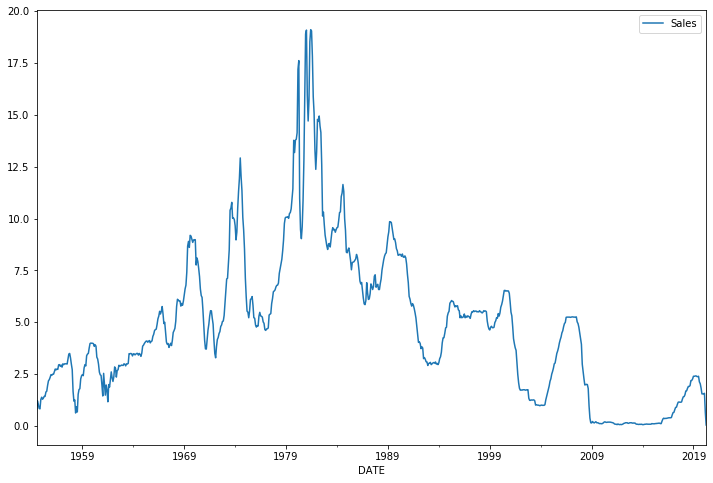

In [78]:
data.plot(figsize=(12,8))

In [79]:
#Creating a test and training data set
test_size=20
test_ind=len(data)-test_size

In [80]:
train=data.iloc[:test_ind]
test=data.iloc[test_ind:]

In [81]:
"""Normalizing the data to feed the network"""
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(train)
scaled_training_dataset=scaler.transform(train)
scaler_test_dataset=scaler.transform(test)

In [82]:
"""Using TimeSeries Generator to transform the data"""
from keras.preprocessing.sequence import TimeseriesGenerator
length=10
generator=TimeseriesGenerator(scaled_training_dataset,scaled_training_dataset,length=length, batch_size=1)

In [83]:
#Creating the model
from keras.models import Sequential
from keras.layers import LSTM, Dropout, BatchNormalization, Dense,Activation
feature=1
#Creating the model
model=Sequential()
model.add(LSTM(units=100,input_shape=(length,feature)))
model.add(Activation('relu'))
model.add(LTSM(100,))
model.add(Dense(units=1))    

model.compile(optimizer='adam',
              loss='mean_squared_error')

In [84]:
from keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss',patience=2)
#Using timeseries Generator for the test dataset
validation_generator=TimeseriesGenerator(scaler_test_dataset,scaler_test_dataset,length=length,batch_size=1)

In [85]:
model.fit_generator(generator,epochs=20,validation_data=validation_generator)

Epoch 1/20
760/760 [==============================] - 4s 6ms/step - loss: 0.0052 - val_loss: 0.0066
Epoch 2/20
760/760 [==============================] - 4s 5ms/step - loss: 0.0026 - val_loss: 0.0092
Epoch 3/20
760/760 [==============================] - 4s 5ms/step - loss: 0.0020 - val_loss: 0.0044
Epoch 4/20
760/760 [==============================] - 4s 5ms/step - loss: 0.0015 - val_loss: 0.0042
Epoch 5/20
760/760 [==============================] - 4s 5ms/step - loss: 0.0014 - val_loss: 0.0015
Epoch 6/20
760/760 [==============================] - 4s 5ms/step - loss: 0.0011 - val_loss: 0.0032
Epoch 7/20
760/760 [==============================] - 4s 6ms/step - loss: 0.0010 - val_loss: 0.0012
Epoch 8/20
760/760 [==============================] - 4s 5ms/step - loss: 0.0011 - val_loss: 0.0035
Epoch 9/20
760/760 [==============================] - 4s 5ms/step - loss: 0.0010 - val_loss: 4.6762e-04
Epoch 10/20
760/760 [==============================] - 4s 5ms/step - loss: 9.9190e-04 - val_loss

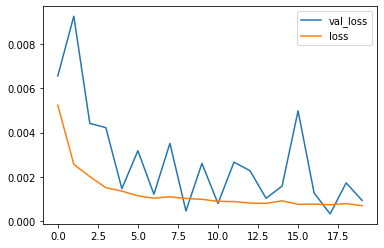

In [86]:
metrics=pd.DataFrame(model.history.history)
metrics.plot()

In [87]:
"""Testing the model to predict the test data which we created earlier"""
test_pred=[]
first_eval_batch=scaled_training_dataset[-length:]
current_batch=first_eval_batch.reshape((1,length,feature))

for i in range(len(test)):
    #predicting the one by one data in the test data to compare of after
    current_pred= model.predict(current_batch)[0]
    
    test_pred.append(current_pred)
    #UPdating the cureent batch
    current_batch=np.append(current_batch[:,1:,:],[[current_pred]],axis=1)
    

In [88]:
#Converting the predicited data in its true form
true_pred=scaler.inverse_transform(test_pred)
test['Prediction']=true_pred


/home/varun/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [89]:
test

,Sales,Prediction
DATE,,
2018-09-01,1.95,1.860093
2018-10-01,2.19,1.789183
2018-11-01,2.20,1.694728
2018-12-01,2.27,1.589194
2019-01-01,2.40,1.480047
2019-02-01,2.40,1.371247
2019-03-01,2.41,1.270186
2019-04-01,2.42,1.179192
2019-05-01,2.39,1.098307


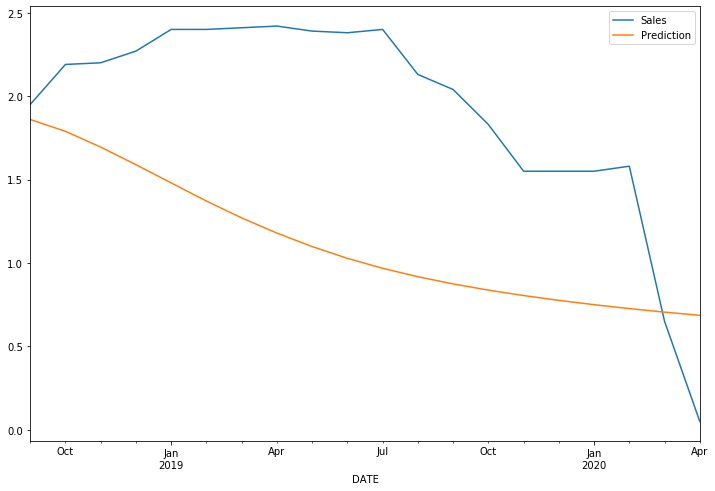

In [90]:
test.plot(figsize=(12,8))

In [91]:
#Sccaling/Normalizing the whole dataset
full_scaler=MinMaxScaler()
scaled_full_dataset=full_scaler.fit_transform(data)

In [92]:
length=12
generator=TimeseriesGenerator(scaled_full_dataset,scaled_full_dataset,length=length,batch_size=1)


In [93]:
#Creating the model
from keras.models import Sequential
from keras.layers import LSTM, Dropout, BatchNormalization, Dense,Activation
feature=1
#Creating the model
model=Sequential()
model.add(LSTM(units=100,input_shape=(length,feature)))
model.add(Activation('relu'))
model.add(Dense(units=1))    

model.compile(optimizer='adam',
              loss='mean_squared_error')
model.fit_generator(generator,epochs=10)

Epoch 1/10
778/778 [==============================] - 5s 6ms/step - loss: 0.0055
Epoch 2/10
778/778 [==============================] - 5s 6ms/step - loss: 0.0026
Epoch 3/10
778/778 [==============================] - 5s 6ms/step - loss: 0.0020
Epoch 4/10
778/778 [==============================] - 5s 6ms/step - loss: 0.0016
Epoch 5/10
778/778 [==============================] - 5s 6ms/step - loss: 0.0014
Epoch 6/10
778/778 [==============================] - 5s 6ms/step - loss: 0.0013
Epoch 7/10
778/778 [==============================] - 5s 6ms/step - loss: 0.0012
Epoch 8/10
778/778 [==============================] - 5s 6ms/step - loss: 9.9785e-04
Epoch 9/10
778/778 [==============================] - 5s 6ms/step - loss: 8.7709e-04
Epoch 10/10
778/778 [==============================] - 5s 6ms/step - loss: 8.7192e-04


In [94]:
"""Forecasting the data in the future using the mode"""
forecast=[]
#User can determine the time period into the future till user want to predict the data/Trend
period=12

first_eval_batch=scaled_full_dataset[-length:]
current_batch=first_eval_batch.reshape((1,length,feature))

for i in range(period):
    current_pred=model.predict(current_batch)[0]
    forecast.append(current_pred)
    
    current_batch=np.append(current_batch[:,1:,:],[[current_pred]],axis=1)
    

In [95]:
forecast=scaler.inverse_transform(forecast)

In [99]:
forecast_index=pd.date_range(start='2020-05-01',periods=period,freq="MS")

In [100]:
forecast_index

DatetimeIndex(['2020-05-01', '2020-06-01', '2020-07-01', '2020-08-01',
               '2020-09-01', '2020-10-01', '2020-11-01', '2020-12-01',
               '2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01'],
              dtype='datetime64[ns]', freq='MS')

In [101]:
forecast_df=pd.DataFrame(data=forecast,index=forecast_index,columns=['Forecast'])

In [102]:
forecast_df

,Forecast
2020-05-01,0.036821
2020-06-01,-0.129971
2020-07-01,-0.168968
2020-08-01,-0.137176
2020-09-01,-0.066374
2020-10-01,0.016150
2020-11-01,0.099132
2020-12-01,0.166300
2021-01-01,0.212489
2021-02-01,0.244010


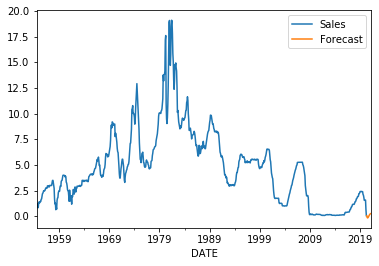

In [104]:
ax=data.plot()
forecast_df.plot(ax=ax)
